# Лабораторная работа 3

Импорт необходимых библиотек,задание границ, функции для расчета кол-ва интервалов М, получение у и тд

In [20]:
from numpy import random
from collections import Counter
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from scipy.stats import chi2
import math
from scipy.stats import vonmises
from scipy.stats import ksone


a = -7
b = 11


def M_make(n):
    if n <= 400:
        return int(math.sqrt(n))
    else:
        if n % int(2*math.log10(n)) == 0:
            return int(2*math.log10(n))
        elif n % int(3*math.log10(n)) == 0:
            return int(3*math.log10(n))
        else:
            return int(4 * math.log10(n))


def density_make(a, b, M):
    return 1/((b - a) *M)


def remake(eps):
    return eps * (b - a) + a


def make_y(x):
    return math.atan(x)

def var_range_make(n):
    eps = [random.uniform(0, 1) for i in range(n)]
    x = map(remake, eps)
    y = list(map(make_y, x))
    y = sorted(y)
    var_range = dict(Counter(y))
    sorted(var_range)
    return y, var_range


*Функция для построения гистограммы равновероятностным методом(необходимо для метода Хи-квадрата)*

In [21]:
def equiprobable_method(y):
    length = len(y)
    M = M_make(length)
    vi = int(length / M)
    A = list()
    A.append(y[0])
    for i in range(1, M):
        A.append((y[i * vi + 1] + y[i * vi]) / 2)
    B = [A[i + 1] for i in range(M - 1)]
    B.append(y[length - 1])
    h = [B[i] - A[i] for i in range(M)]
    f = [vi / (h[i] * length) for i in range(M)]
    table = PrettyTable()
    table.field_names = ["interval", "f"]
    theoretical_table = PrettyTable()
    theoretical_table.field_names = ["value", "f"]
    for i in range(len(f)):
        table.add_row([str(A[i]) + ";" + str(B[i]), f[i]])
        theoretical_table.add_row([str((A[i] + B[i]) / 2), 1 / (18 * (math.cos((A[i] + B[i]) / 2) ** 2))])
    print("table")
    print(table)
    print("theoretical table")
    print(theoretical_table)
    return f, h, M, A, B, vi

*Функция проверки по критерию Хи-квадрат. Список р содержит вероятность попадания случайной величины в заданный интервал. В if осуществляется проверка того, что сумма всех вероятностей будет практически равна 1. Так как закон распределения не зависит от каких-либо неизвестных нам параметров, то  S = 0 и k = M -1*

In [22]:
def alpha_count(M, A, B, v, n):
    p = [(math.tan(B[i])/18 - math.tan(A[i])/18) for i in range(M)]
    if abs(sum(p) - 1) <= 0.05:
        alpha_list = [((v-n*p[i])**2)/(n*p[i]) for i in range(M)]
        alpha_in_square = sum(alpha_list)
        k = M - 1
        a = float(input("enter alpha"))
        alpha = chi2.isf(a, k)
        if alpha_in_square > alpha:
            print("false")
        else:
            print("true")
    else:
        print("incorrect p")

*Построение графика для кусочной функции.*

In [23]:
def build_graphics(function, color):
    keys = list(function.keys())
    length = len(keys)
    i = 0
    while i + 1 < length:
        X = [float(keys[i]), float(keys[i + 1])]
        Y = [function[keys[i+1]], function[keys[i+1]]]
        plt.plot(X, Y, color=color)
        i += 1
    X = [float(keys[0]-0.07), float(keys[0])]
    Y = [0, 0]
    plt.plot(X, Y, color=color)
    X = [float(keys[-1]), float(keys[-1] + 0.07)]
    Y = [1, 1]
    plt.plot(X, Y, color=color)

*Проверка критерием Колмогорова с построением графика( в цикле i имеет такие пределы для более красивого отображения)*

In [24]:
def Kolmogorov_check(var_range):
    empirical_function = {i: 0 for i in var_range.keys()}
    for i in empirical_function.keys():
        for j in var_range.keys():
            if j < i:
                empirical_function[i] += var_range[j]
        empirical_function[i] /= n
    plt.text(-1.5, 1, "theoretical", color="red", fontsize=14)
    plt.text(-1.5, 0.8, "empirical", color="blue", fontsize=14)
    i = -1.43
    x_list = []
    y_list = []
    while i <= 1.4802:
        x_list.append(i)
        y_list.append(math.tan(i) / 18 + 7 / 18)
        i += 0.01
    plt.plot(x_list, y_list,  color="red")
    values = list(var_range.keys())
    max_delta = max([max([abs((i + 1)/n - (math.tan(values[i])/18 + 7/18)), abs(math.tan(values[i])/18 + 7/18 - ((i + 1-1)/n))]) for i in range(n)])
    alpha = math.sqrt(n) * max_delta
    a = float(input("enter alpha"))
    alpha_k = n ** 0.5 * ksone.ppf(1 - (1-a)/2, n)
    if alpha > alpha_k:
        print("false")
    else:
        print("true")
    build_graphics(empirical_function, "blue")
    plt.grid()
    plt.show()

*Проверка по критерию Мизеса*

In [30]:
def Mises_check(var_range):
    values = list(var_range.keys())
    statistic_criteria = 1/(12*n)*sum([(math.tan(values[i])/18 + 7/18 - (i + 1-0.5)/n)**2 for i in range(n)])
    a = float(input("enter alpha"))
    delta = vonmises.ppf(1 - a/2, n)
    if delta > statistic_criteria:
        print("true")
    else:
        print("false")


**Проверка для различных по объему выборкам разных критериев**
1. *По критерию хи-квадрат с построением графиков*

table
+-----------------------------------------+---------------------+
|                 interval                |          f          |
+-----------------------------------------+---------------------+
| -1.4249035286601288;-1.3925458829241917 |  2.1633217871056796 |
| -1.3925458829241917;-1.3538785683639316 |  1.8103144941940648 |
|  -1.3538785683639316;-1.289696003468547 |  1.0906388692022135 |
|  -1.289696003468547;-1.0300238618662279 |  0.2695706962173983 |
| -1.0300238618662279;-0.4070136909051678 | 0.11235771623441956 |
|  -0.4070136909051678;0.711089981465929  | 0.06260600133040893 |
|   0.711089981465929;1.117689767284055   | 0.17215946107583874 |
|   1.117689767284055;1.258622665081434   | 0.49669027667791094 |
|   1.258622665081434;1.339252314125809   |  0.8681669935270973 |
|    1.339252314125809;1.38081454339279   |  1.684221497127711  |
|    1.38081454339279;1.420449915302202   |  1.7660992347942983 |
|   1.420449915302202;1.4452052064354048  |  2.827678318277313  |
|  1

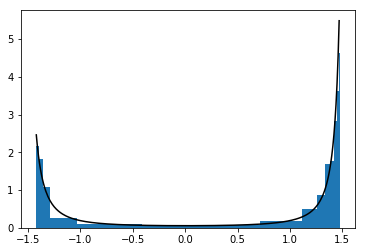

In [28]:
n = 200
y, var_range = var_range_make(n)
f, h, M, A, B, v = equiprobable_method(y)
alpha_count(M, A, B, v, n)
x = [y[0]+(h[0]/2)]
for i in range(len(f)-1):
    x.append(x[i] + h[i]/2 + h[i+1]/2)
plt.bar(x, f, h)
i = -1.42
x_list = []
y_list = []
while i <= 1.48:
    x_list.append(i)
    y_list.append(1/(18 * (math.cos(i))**2))
    i += 0.01
plt.plot(x_list, y_list,  color="black")
plt.show()

2. *По критерию Колмогорова с построением графиков*

enter alpha0.9992
true


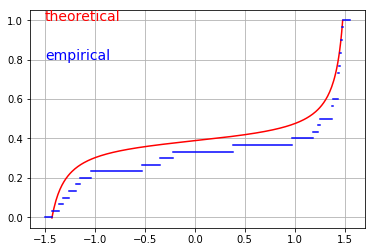

In [29]:
n = 30
y, var_range = var_range_make(n)
empirical_function = {i: 0 for i in var_range.keys()}
for i in empirical_function.keys():
    for j in var_range.keys():
        if j < i:
            empirical_function[i] += var_range[j]
    empirical_function[i] /= n
plt.text(-1.5, 1, "theoretical", color="red", fontsize=14)
plt.text(-1.5, 0.8, "empirical", color="blue", fontsize=14)
i = -1.43
x_list = []
y_list = []
while i <= 1.4802:
    x_list.append(i)
    y_list.append(math.tan(i) / 18 + 7 / 18)
    i += 0.01
plt.plot(x_list, y_list,  color="red")
values = list(var_range.keys())
max_delta = max([max([abs((i + 1)/n - (math.tan(values[i])/18 + 7/18)), abs(math.tan(values[i])/18 + 7/18 - ((i + 1-1)/n))]) for i in range(n)])
alpha = math.sqrt(n) * max_delta
a = float(input("enter alpha"))
alpha_k = n ** 0.5 * ksone.ppf(1 - (1-a)/2, n)
if alpha > alpha_k:
    print("false")
else:
    print("true")
build_graphics(empirical_function, "blue")
plt.grid()
plt.show()

3. *По критерию Мизеса*

In [32]:
n = 50
y, var_range = var_range_make(n)
Mises_check(var_range)

enter alpha0.01
true
